<a href="https://colab.research.google.com/github/PsCushman/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
from tensorflow.keras.callbacks import Callback

class SaveWeightsCallback(Callback):
    def __init__(self):
        super(SaveWeightsCallback, self).__init__()

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 == 0:  # Save weights every five epochs
            self.model.save_weights(f'weights_epoch_{epoch}.h5')
            print(f'Saved weights at epoch {epoch}')

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)

In [4]:
# Determine the number of unique values in each column.
unique_counts = application_df.nunique()

# Print the number of unique values in each column.
print(unique_counts)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [5]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df['APPLICATION_TYPE'].value_counts()
print(app_type_counts)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500

# Get the application types with counts below the cutoff
application_types_to_replace = app_type_counts[app_type_counts < cutoff_value].index.tolist()

# Print the application types to be replaced
print(application_types_to_replace)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_gt1 = classification_counts[classification_counts > 1]
print(classification_counts_gt1)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64


In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

# Choose a cutoff value for classifications
cutoff_value_classification = 100

# Get the classifications with counts below the cutoff
classifications_to_replace = classification_counts[classification_counts < cutoff_value_classification].index.tolist()

# Print the classifications to be replaced
print(classifications_to_replace)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

['C2800', 'C7100', 'C1300', 'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235', 'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260', 'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190', 'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900', 'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283', 'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500', 'C2150']


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with pd.get_dummies
application_df_encoded = pd.get_dummies(application_df,dtype=float)

# Display the first few rows of the encoded DataFrame
application_df_encoded.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Split our preprocessed data into our features and target arrays
X = application_df_encoded.drop('IS_SUCCESSFUL', axis=1)  # Features (remove the target column)
y = application_df_encoded['IS_SUCCESSFUL']              # Target

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (27439, 49)
X_test shape: (6860, 49)
y_train shape: (27439,)
y_test shape: (6860,)


In [12]:
# Instantiate and train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# Get feature importances
feature_importances = rf.feature_importances_

# Print feature importances
for feature_name, importance in zip(X_train.columns, feature_importances):
    print(f"{feature_name}: {importance}")

STATUS: 0.00018494667196927
ASK_AMT: 0.3983797440194912
APPLICATION_TYPE_Other: 0.0019408188952150913
APPLICATION_TYPE_T10: 0.024708889996689225
APPLICATION_TYPE_T19: 0.017388458902951827
APPLICATION_TYPE_T3: 0.01591713420473197
APPLICATION_TYPE_T4: 0.017172538401026022
APPLICATION_TYPE_T5: 0.02799837690766057
APPLICATION_TYPE_T6: 0.011716831502297695
APPLICATION_TYPE_T7: 0.0041760109618266044
APPLICATION_TYPE_T8: 0.004801506436935142
AFFILIATION_CompanySponsored: 0.11865696967158036
AFFILIATION_Family/Parent: 0.0011724592207006997
AFFILIATION_Independent: 0.13589728516715724
AFFILIATION_National: 0.0006490281961593055
AFFILIATION_Other: 9.369036999699003e-05
AFFILIATION_Regional: 0.0003506082229216856
CLASSIFICATION_C1000: 0.013115506231349362
CLASSIFICATION_C1200: 0.00944390771736905
CLASSIFICATION_C1270: 0.0006060663375416443
CLASSIFICATION_C1700: 0.003053242442172044
CLASSIFICATION_C2000: 0.01749162107712266
CLASSIFICATION_C2100: 0.01944366829214328
CLASSIFICATION_C2700: 0.00218832

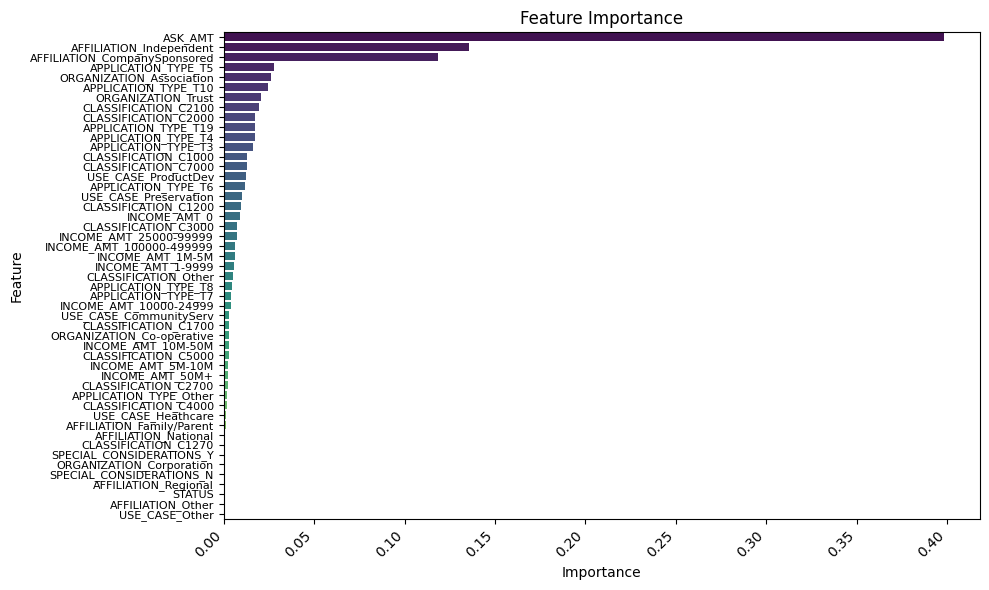

In [14]:
feature_importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')

#Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adjust font size of y-axis labels
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


In [15]:
# Convert your DataFrame to a NumPy array
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

num_top_features = 49
top_feature_indices = feature_importances.argsort()[-num_top_features:][::-1]
selected_X_train = X_train_np[:, top_feature_indices]
selected_X_test = X_test_np[:, top_feature_indices]

# Create a new y_train corresponding to selected features
selected_y_train = y_train.to_numpy()

In [16]:
# Display the shapes of the training and testing datasets
print("Selected X_train shape:", selected_X_train.shape)
print("Selected X_test shape:", selected_X_test.shape)
print("Selected y_train shape:", selected_y_train.shape)

Selected X_train shape: (27439, 49)
Selected X_test shape: (6860, 49)
Selected y_train shape: (27439,)


In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler on the training data
X_scaler = scaler.fit(selected_X_train)

# Scale the training and test data
selected_X_train_scaled = X_scaler.transform(selected_X_train)
selected_X_test_scaled = X_scaler.transform(selected_X_test)

print("Selected X_train shape:", selected_X_train_scaled.shape)
print("Selected X_test shape:", selected_X_test_scaled.shape)
print("Selected y_train shape:", selected_y_train.shape)

Selected X_train shape: (27439, 49)
Selected X_test shape: (6860, 49)
Selected y_train shape: (27439,)


## Compile, Train and Evaluate the Model

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = Sequential()

unit_1=7
unit_2=14

# First hidden layer
nn.add(Dense(units=unit_1, input_dim=selected_X_train.shape[1], activation='tanh'))

# Second hidden layer
nn.add(Dense(units=unit_2, activation='relu'))

# Output layer
nn.add(Dense(units=1, activation='sigmoid'))


# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 7)                 350       
                                                                 
 dense_7 (Dense)             (None, 14)                112       
                                                                 
 dense_8 (Dense)             (None, 1)                 15        
                                                                 
Total params: 477
Trainable params: 477
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Train the model
history = nn.fit(selected_X_train_scaled, selected_y_train, epochs=50, verbose=1, callbacks=[SaveWeightsCallback()])

Epoch 1/50
858/858 [==============================] - 9s 9ms/step - loss: 0.6005 - accuracy: 0.6838
Epoch 2/50
858/858 [==============================] - 5s 6ms/step - loss: 0.5564 - accuracy: 0.7270
Epoch 3/50
858/858 [==============================] - 3s 4ms/step - loss: 0.5526 - accuracy: 0.7290
Epoch 4/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5504 - accuracy: 0.7298
Epoch 5/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5493 - accuracy: 0.7319
Epoch 6/50
858/858 [==============================] - 3s 3ms/step - loss: 0.5484 - accuracy: 0.7313
Epoch 7/50
858/858 [==============================] - 2s 3ms/step - loss: 0.5475 - accuracy: 0.7319
Epoch 8/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5469 - accuracy: 0.7322
Epoch 9/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5465 - accuracy: 0.7320
Epoch 10/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5458 - accuracy: 0.7325

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(selected_X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - loss: 0.5524 - accuracy: 0.7268 - 508ms/epoch - 2ms/step
Loss: 0.5524075031280518, Accuracy: 0.7268221378326416


In [22]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
num_components = 10  # Choose the number of principal components you want to retain
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Display the explained variance ratio of the selected components
print("Explained Variance Ratio of Selected Components:", pca.explained_variance_ratio_)

# Display the shapes of the PCA-transformed datasets
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)

Explained Variance Ratio of Selected Components: [0.09625362 0.05705982 0.04124027 0.03828023 0.0346981  0.03176571
 0.02937858 0.02846843 0.02578897 0.02322708]
X_train_pca shape: (27439, 10)
X_test_pca shape: (6860, 10)


In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = Sequential()

# First hidden layer
nn.add(Dense(units=unit_1, input_dim=X_train_pca.shape[1], activation='tanh'))

# Second hidden layer
nn.add(Dense(units=unit_2, activation='relu'))

# Output layer
nn.add(Dense(units=1, activation='sigmoid'))


# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 7)                 77        
                                                                 
 dense_10 (Dense)            (None, 14)                112       
                                                                 
 dense_11 (Dense)            (None, 1)                 15        
                                                                 
Total params: 204
Trainable params: 204
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Train the model
history = nn.fit(X_train_pca, y_train, epochs=50, verbose=1)

Epoch 1/50
858/858 [==============================] - 3s 2ms/step - loss: 0.6022 - accuracy: 0.6906
Epoch 2/50
858/858 [==============================] - 3s 4ms/step - loss: 0.5760 - accuracy: 0.7224
Epoch 3/50
858/858 [==============================] - 4s 4ms/step - loss: 0.5676 - accuracy: 0.7243
Epoch 4/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5645 - accuracy: 0.7246
Epoch 5/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5623 - accuracy: 0.7264
Epoch 6/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5612 - accuracy: 0.7279
Epoch 7/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5600 - accuracy: 0.7275
Epoch 8/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5590 - accuracy: 0.7278
Epoch 9/50
858/858 [==============================] - 2s 3ms/step - loss: 0.5581 - accuracy: 0.7276
Epoch 10/50
858/858 [==============================] - 3s 3ms/step - loss: 0.5573 - accuracy: 0.7273

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_pca, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - loss: 0.5588 - accuracy: 0.7261 - 972ms/epoch - 5ms/step
Loss: 0.5587559938430786, Accuracy: 0.7260932922363281


In [27]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Export our model to HDF5 file in your Google Drive
nn.save("/content/drive/MyDrive/trained_model.h5")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
